# Setting up the final dataframe

In [37]:
#Import relevant tools to the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3
%matplotlib inline

In [38]:
#Load the movie budgets table into notebook
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [39]:
#Stip commas and dollar signs from the budget and gross columns.  Convert these values into integers.

movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('int64')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('int64')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('int64')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [40]:
#Calculate the total profit each movie made by subtracting the production budget from the worldwide gross
movie_budgets['total_profit'] = movie_budgets.apply(lambda x: (x['worldwide_gross']) - x['production_budget'], axis=1)
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [41]:
#Drop ID column
movie_budgets=movie_budgets.drop(['id'], axis=1)
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [42]:
#Convert the release date to numerical format and create a new column called 'Release_month' to store the month number
movie_budgets['release_month'] = pd.DatetimeIndex(movie_budgets['release_date']).month
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_month
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,6
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12


In [43]:
#Create function to group months into seasons
def seasons(x):
    if (x > 11 or x <= 3):
        return "Winter"
    elif(x == 4 or x == 5):
        return "Spring"
    elif(x >= 6 and x <= 9):
        return "Summer"
    else:
        return "Fall"

In [44]:
#Create function to convert numerical month into month name
def month_name(x):
     if (x == 1):
        return "Jan"
     if (x == 2):
        return "Feb"
     if (x == 3):
        return "Mar"
     if (x == 4):
        return "Apr"
     if (x == 5):
        return "May"
     if (x == 6):
        return "Jun"
     if (x == 7):
        return "Jul"
     if (x == 8):
        return "Aug"
     if (x == 9):
        return "Sep"
     if (x == 10):
        return "Oct"
     if (x == 11):
        return "Nov"
     if (x == 12):
        return "Dec"

In [45]:
#Add column for the name of the month by appling the month_name function
movie_budgets['month_name'] = movie_budgets['release_month'].apply(month_name)
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_month,month_name
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,12,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5,May
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,6,Jun
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5,May
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12,Dec
...,...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,-7000,12,Dec
5778,"Apr 2, 1999",Following,6000,48482,240495,234495,4,Apr
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,7,Jul
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,9,Sep


In [46]:
#Add column for the season each movie is released in using the seasons function
movie_budgets['season'] = movie_budgets['release_month'].apply(seasons)
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_month,month_name,season
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,12,Dec,Winter
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5,May,Spring
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,6,Jun,Summer
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5,May,Spring
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12,Dec,Winter


In [47]:
#Import Title Basics table to get genre information
genres = pd.read_csv('title.basics.csv')
genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [48]:
#Combine the budgets and genres tables
genres.rename(columns={'primary_title': 'movie'}, inplace=True)
genres.set_index('movie', inplace=True)
movie_budgets.set_index('movie', inplace=True)
combined = movie_budgets.join(genres, how="inner")
combined.reset_index(inplace=True)
combined.head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross,total_profit,release_month,month_name,season,tconst,original_title,start_year,runtime_minutes,genres
0,#Horror,"Nov 20, 2015",1500000,0,0,-1500000,11,Nov,Fall,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror"
1,10 Cloverfield Lane,"Mar 11, 2016",5000000,72082999,108286422,103286422,3,Mar,Winter,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
2,10 Days in a Madhouse,"Nov 11, 2015",12000000,14616,14616,-11985384,11,Nov,Fall,tt3453052,10 Days in a Madhouse,2015,111.0,Drama
3,12 Rounds,"Mar 27, 2009",20000000,12234694,17306648,-2693352,3,Mar,Winter,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance"
4,12 Strong,"Jan 19, 2018",35000000,45819713,71118378,36118378,1,Jan,Winter,tt1413492,12 Strong,2018,130.0,"Action,Drama,History"


In [49]:
#Select columns for final DataFrame
combined_df = combined[['movie', 'release_date', 'genres', 'release_month', 'month_name', 'start_year', 'season', 
                             'production_budget', 'domestic_gross', 'worldwide_gross', 'total_profit']]
combined_df.head()

,movie,release_date,genres,release_month,month_name,start_year,season,production_budget,domestic_gross,worldwide_gross,total_profit
0,#Horror,"Nov 20, 2015","Crime,Drama,Horror",11,Nov,2015,Fall,1500000,0,0,-1500000
1,10 Cloverfield Lane,"Mar 11, 2016","Drama,Horror,Mystery",3,Mar,2016,Winter,5000000,72082999,108286422,103286422
2,10 Days in a Madhouse,"Nov 11, 2015",Drama,11,Nov,2015,Fall,12000000,14616,14616,-11985384
3,12 Rounds,"Mar 27, 2009","Action,Drama,Romance",3,Mar,2017,Winter,20000000,12234694,17306648,-2693352
4,12 Strong,"Jan 19, 2018","Action,Drama,History",1,Jan,2018,Winter,35000000,45819713,71118378,36118378


In [50]:
#Check how many values are in each column
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 11 columns):
movie                3815 non-null object
release_date         3815 non-null object
genres               3743 non-null object
release_month        3815 non-null int64
month_name           3815 non-null object
start_year           3815 non-null int64
season               3815 non-null object
production_budget    3815 non-null int64
domestic_gross       3815 non-null int64
worldwide_gross      3815 non-null int64
total_profit         3815 non-null int64
dtypes: int64(6), object(5)
memory usage: 328.0+ KB


In [51]:
#Drop rows that have a null value in the 'genres' column
combined_df = combined_df.dropna(subset = ['genres'])

In [52]:
#Ensure that each column has the same number of values
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 3814
Data columns (total 11 columns):
movie                3743 non-null object
release_date         3743 non-null object
genres               3743 non-null object
release_month        3743 non-null int64
month_name           3743 non-null object
start_year           3743 non-null int64
season               3743 non-null object
production_budget    3743 non-null int64
domestic_gross       3743 non-null int64
worldwide_gross      3743 non-null int64
total_profit         3743 non-null int64
dtypes: int64(6), object(5)
memory usage: 350.9+ KB


In [53]:
#Drop all instances of duplicates besides the first instance and reset index
combined_df.drop_duplicates(subset ="movie", 
                     keep = 'first', inplace = True) 
combined_df = combined_df.reset_index(drop=True)
combined_df.head(100)

,movie,release_date,genres,release_month,month_name,start_year,season,production_budget,domestic_gross,worldwide_gross,total_profit
0,#Horror,"Nov 20, 2015","Crime,Drama,Horror",11,Nov,2015,Fall,1500000,0,0,-1500000
1,10 Cloverfield Lane,"Mar 11, 2016","Drama,Horror,Mystery",3,Mar,2016,Winter,5000000,72082999,108286422,103286422
2,10 Days in a Madhouse,"Nov 11, 2015",Drama,11,Nov,2015,Fall,12000000,14616,14616,-11985384
3,12 Rounds,"Mar 27, 2009","Action,Drama,Romance",3,Mar,2017,Winter,20000000,12234694,17306648,-2693352
4,12 Strong,"Jan 19, 2018","Action,Drama,History",1,Jan,2018,Winter,35000000,45819713,71118378,36118378
...,...,...,...,...,...,...,...,...,...,...,...
95,Aliens,"Jul 18, 1986","Comedy,Mystery,Sci-Fi",7,Jul,2014,Summer,17000000,85160248,183316455,166316455
96,Alita: Battle Angel,"Feb 14, 2019","Action,Adventure,Sci-Fi",2,Feb,2019,Winter,170000000,85710210,402976036,232976036
97,Alive,"Jan 15, 1993",Drama,1,Jan,2014,Winter,32000000,36299670,36299670,4299670
98,All Eyez on Me,"Jun 16, 2017","Biography,Drama,Music",6,Jun,2017,Summer,45000000,44922302,54876855,9876855


In [54]:
#Check to see how many values we have after removing the duplicated movies
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 11 columns):
movie                2299 non-null object
release_date         2299 non-null object
genres               2299 non-null object
release_month        2299 non-null int64
month_name           2299 non-null object
start_year           2299 non-null int64
season               2299 non-null object
production_budget    2299 non-null int64
domestic_gross       2299 non-null int64
worldwide_gross      2299 non-null int64
total_profit         2299 non-null int64
dtypes: int64(6), object(5)
memory usage: 197.7+ KB


# Find out which genres appear most in the Top 1000 profiting movies

In [55]:
# Create a set of all types of genres listed
all_genres = set()
for genres in combined_df['genres']:
    if genres:
        all_genres.update(genres)
all_genres

{',',
 '-',
 'A',
 'B',
 'C',
 'D',
 'F',
 'H',
 'M',
 'N',
 'R',
 'S',
 'T',
 'W',
 'a',
 'c',
 'd',
 'e',
 'g',
 'h',
 'i',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y'}

In [56]:
# Deal with multiple genres so each is an individual list
combined_df['genres'] = combined_df['genres'].apply(lambda x: x.split(",") if x else x)
combined_df.head()

,movie,release_date,genres,release_month,month_name,start_year,season,production_budget,domestic_gross,worldwide_gross,total_profit
0,#Horror,"Nov 20, 2015","[Crime, Drama, Horror]",11,Nov,2015,Fall,1500000,0,0,-1500000
1,10 Cloverfield Lane,"Mar 11, 2016","[Drama, Horror, Mystery]",3,Mar,2016,Winter,5000000,72082999,108286422,103286422
2,10 Days in a Madhouse,"Nov 11, 2015",[Drama],11,Nov,2015,Fall,12000000,14616,14616,-11985384
3,12 Rounds,"Mar 27, 2009","[Action, Drama, Romance]",3,Mar,2017,Winter,20000000,12234694,17306648,-2693352
4,12 Strong,"Jan 19, 2018","[Action, Drama, History]",1,Jan,2018,Winter,35000000,45819713,71118378,36118378


In [57]:
# Create a list of all genres
all_genres = list(all_genres)

In [58]:
# Create columns for each type of genre and begin with a value of 0
for genre in all_genres:
    combined_df[genre] = np.zeros(shape=combined_df.shape[0])
                                
combined_df.head()

,movie,release_date,genres,release_month,month_name,start_year,season,production_budget,domestic_gross,worldwide_gross,...,",",w,h,m,A,F,T,c,B,a
0,#Horror,"Nov 20, 2015","[Crime, Drama, Horror]",11,Nov,2015,Fall,1500000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10 Cloverfield Lane,"Mar 11, 2016","[Drama, Horror, Mystery]",3,Mar,2016,Winter,5000000,72082999,108286422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10 Days in a Madhouse,"Nov 11, 2015",[Drama],11,Nov,2015,Fall,12000000,14616,14616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12 Rounds,"Mar 27, 2009","[Action, Drama, Romance]",3,Mar,2017,Winter,20000000,12234694,17306648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12 Strong,"Jan 19, 2018","[Action, Drama, History]",1,Jan,2018,Winter,35000000,45819713,71118378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Sort movies by total profits for the top 1000 grossing movies
top_profits =combined_df.sort_values(by='total_profit', ascending=False)['movie'][:1000]
top_profits.head()

176                     Avatar
2104                   Titanic
178     Avengers: Infinity War
930             Jurassic World
673                  Furious 7
Name: movie, dtype: object

In [60]:
# Count the types of genres for the top 1000 movies 
genre_count = {}
for movie in top_profits:
    movie_genres = combined_df[combined_df['movie']==movie]['genres'].values[0]
    try:
        for genre in movie_genres:
            genre_count[genre] = genre_count.get(genre, 0) + 1
    except:
        genre_count['not_listed'] = genre_count.get('not_listed', 0) + 1

genre_count


{'Horror': 112,
 'Adventure': 287,
 'Action': 308,
 'Sci-Fi': 96,
 'Crime': 117,
 'Thriller': 164,
 'Drama': 416,
 'Sport': 15,
 'Fantasy': 83,
 'Romance': 103,
 'Animation': 94,
 'Comedy': 324,
 'Biography': 75,
 'Music': 26,
 'Family': 69,
 'Mystery': 82,
 'Musical': 6,
 'Documentary': 56,
 'Western': 4,
 'History': 21,
 'War': 12,
 'News': 1}

In [61]:
# Convert into a DF for the top 1000 movies
genre_top_count_df = pd.DataFrame([genre_count])
genre_top_count_df

,Horror,Adventure,Action,Sci-Fi,Crime,Thriller,Drama,Sport,Fantasy,Romance,...,Biography,Music,Family,Mystery,Musical,Documentary,Western,History,War,News
0,112,287,308,96,117,164,416,15,83,103,...,75,26,69,82,6,56,4,21,12,1


In [62]:
# Create values and labels
values = []
labels = []

for genre, count in genre_count.items():
    labels.append(genre)
    values.append(count)

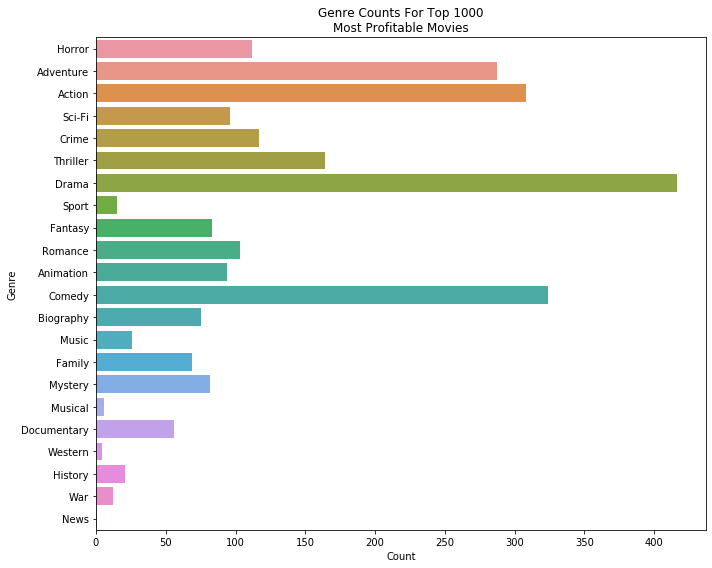

In [63]:
#Create bar chart showing the counts for each genre of movie
fig, axes = plt.subplots(figsize=(10,8))
sns.barplot(values, labels, ax=axes)
plt.ylabel('Genre')
plt.xlabel('Count')
plt.title('Genre Counts For Top 1000\nMost Profitable Movies')
plt.tight_layout()
plt.show()

# Find out the average profit of each genre using the Top 1000 most profitable movies

In [64]:
#Explode the 'genres' so that each movie has a seperate row for each of it's genres
genre_profits =combined_df.sort_values(by='total_profit', ascending=False)[:1000]
genres_df = genre_profits.explode('genres')
genres_df.head()

,movie,release_date,genres,release_month,month_name,start_year,season,production_budget,domestic_gross,worldwide_gross,...,",",w,h,m,A,F,T,c,B,a
1,10 Cloverfield Lane,"Mar 11, 2016",Drama,3,Mar,2016,Winter,5000000,72082999,108286422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10 Cloverfield Lane,"Mar 11, 2016",Horror,3,Mar,2016,Winter,5000000,72082999,108286422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10 Cloverfield Lane,"Mar 11, 2016",Mystery,3,Mar,2016,Winter,5000000,72082999,108286422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12 Strong,"Jan 19, 2018",Action,1,Jan,2018,Winter,35000000,45819713,71118378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12 Strong,"Jan 19, 2018",Drama,1,Jan,2018,Winter,35000000,45819713,71118378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


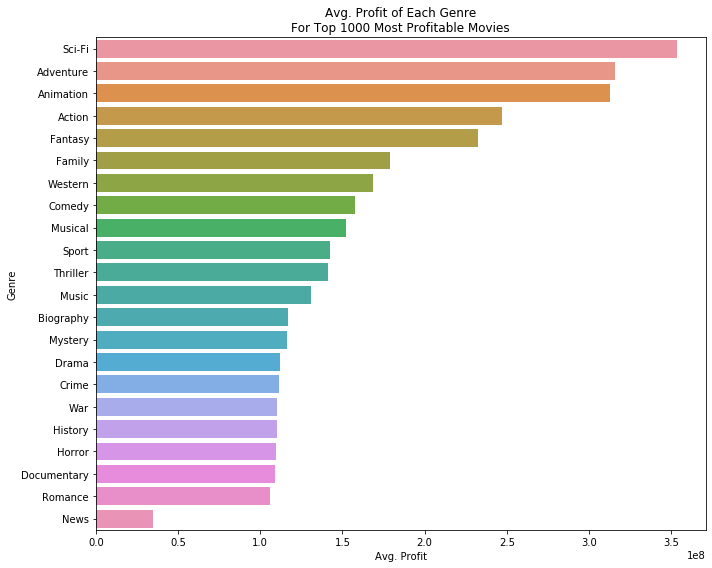

In [65]:
#Create bar chart showing the average profit of each genre for the top 1000 most profitable movies
fig, axes = plt.subplots(figsize=(10,8))
mod_genres_df = genres_df.groupby('genres').mean().reset_index().sort_values('total_profit', ascending=False)
sns.barplot(x='total_profit', y='genres', data=mod_genres_df, ax=axes)
plt.ylabel('Genre')
plt.xlabel('Avg. Profit')
plt.title('Avg. Profit of Each Genre\nFor Top 1000 Most Profitable Movies')
plt.tight_layout()
plt.show()

# Find the average profit in each season by genre for the Top 1000 most profitable movies

In [66]:
#Use groupby to show the average total profit by season for each genre
genre_profit_mean = genres_df.groupby(['genres', 'season'])['total_profit'].mean()
genre_profit_mean

genres     season
Action     Fall      2.281633e+08
           Spring    4.008847e+08
           Summer    2.169861e+08
           Winter    2.166050e+08
Adventure  Fall      3.120774e+08
                         ...     
War        Spring    1.457000e+08
           Summer    1.182370e+08
           Winter    1.056690e+08
Western    Summer    7.252516e+07
           Winter    2.009340e+08
Name: total_profit, Length: 82, dtype: float64

Text(0, 0.5, 'AVG Profit')

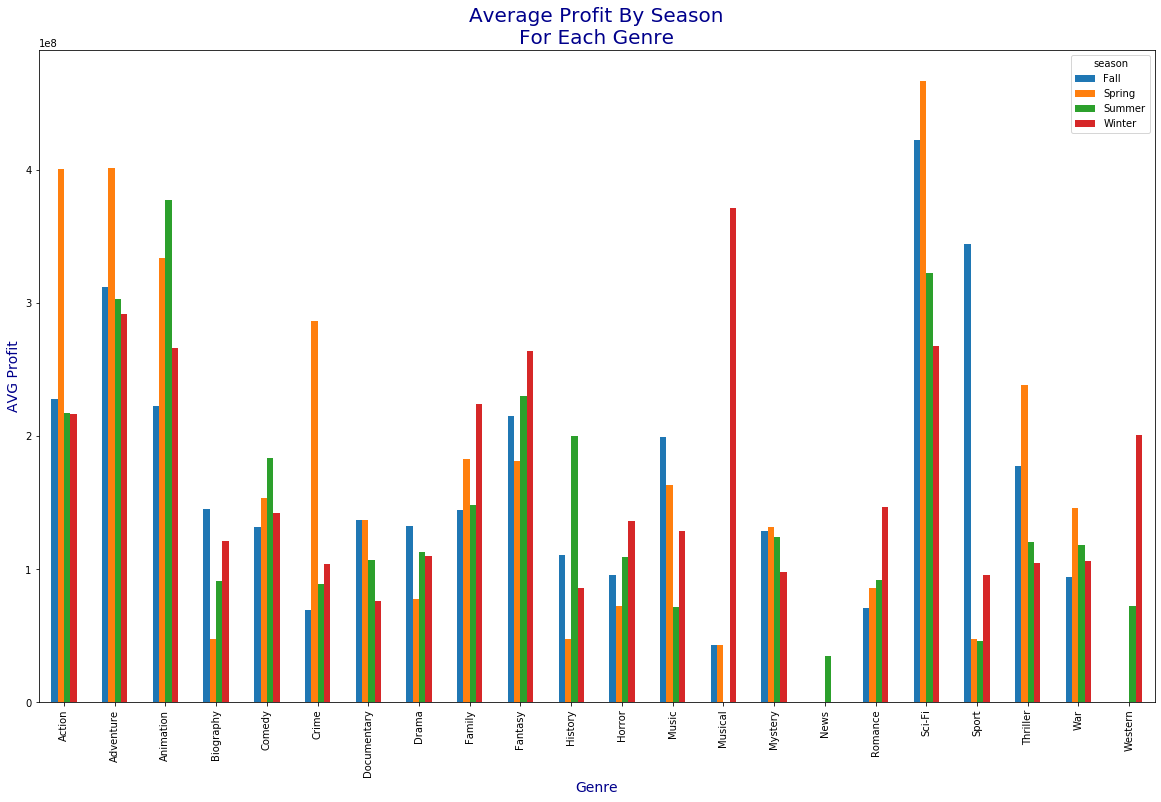

In [67]:
#Create a barchart showing the average profit by season for each genre
fig = genre_profit_mean.unstack().plot(kind = 'bar', figsize=(20,12))
plt.title("Average Profit By Season\nFor Each Genre", fontsize=20, color='darkblue')
plt.xlabel('Genre', fontsize=14, color='darkblue')
plt.ylabel('AVG Profit', fontsize=14, color='darkblue')

# Find the average profit by season for each year over the last decade

In [68]:
#Create a new data frame that only consists of data between 2010-2019
seasonal_profits = combined_df[(combined_df['start_year'] >= 2009) & (combined_df['start_year'] <= 2019)]

In [69]:
#Use groupby to show the average total profit by season for each year
seasonal_profit_mean = seasonal_profits.groupby(['start_year', 'season'])['total_profit'].mean()
seasonal_profit_mean

start_year  season
2010        Fall      5.974269e+07
            Spring    4.504297e+07
            Summer    7.386222e+07
            Winter    5.327502e+07
2011        Fall      3.978269e+07
            Spring    9.092812e+07
            Summer    4.741673e+07
            Winter    6.655827e+07
2012        Fall      8.398986e+07
            Spring    6.408241e+07
            Summer    7.494830e+07
            Winter    7.873112e+07
2013        Fall      6.441222e+07
            Spring    7.222027e+07
            Summer    8.220875e+07
            Winter    4.992045e+07
2014        Fall      7.398119e+07
            Spring    1.323210e+08
            Summer    6.416712e+07
            Winter    6.242333e+07
2015        Fall      4.713699e+07
            Spring    9.275828e+07
            Summer    8.002457e+07
            Winter    3.076173e+07
2016        Fall      7.136260e+07
            Spring    7.939242e+07
            Summer    8.539754e+07
            Winter    9.770438e+07
2

Text(0, 0.5, 'AVG Profit')

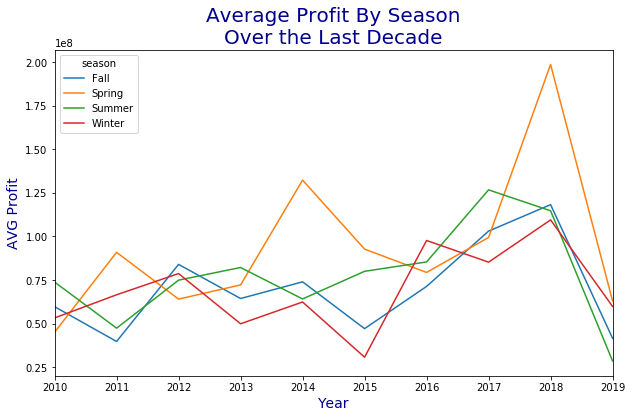

In [70]:
#Create a line chart showing the average profit by season over the last decade
fig = seasonal_profit_mean.unstack().plot(kind = 'line', figsize=(10,6))
plt.title("Average Profit By Season\nOver the Last Decade", fontsize=20, color='darkblue')
plt.xlabel('Year', fontsize=14, color='darkblue')
plt.ylabel('AVG Profit', fontsize=14, color='darkblue')

# Find the average profit by month for each year over the last decade

In [71]:
#Use groupby to show the average total profit by month for each year
monthly_profit_mean = seasonal_profits.groupby(['start_year', 'month_name'])['total_profit'].mean()
monthly_profit_mean.head(24)

start_year  month_name
2010        Apr           2.681349e+07
            Aug           3.455704e+07
            Dec           4.567186e+07
            Feb           4.644232e+07
            Jan           2.305757e+07
            Jul           1.223859e+08
            Jun           1.160997e+08
            Mar           9.301657e+07
            May           7.147572e+07
            Nov           1.034809e+08
            Oct           3.103950e+07
            Sep           2.991609e+07
2011        Apr           6.004202e+07
            Aug           3.533255e+07
            Dec           1.565142e+08
            Feb           2.551047e+07
            Jan           2.479474e+07
            Jul           4.129753e+07
            Jun           1.507611e+08
            Mar           2.627177e+07
            May           1.246221e+08
            Nov           4.293115e+07
            Oct           3.728564e+07
            Sep           9.318425e+06
Name: total_profit, dtype: float64

Text(0, 0.5, 'AVG Profit')

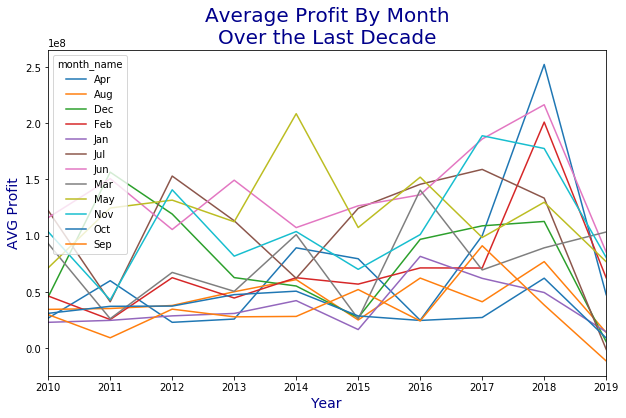

In [72]:
#Create a line chart showing the average profit by season over the last decade
fig = monthly_profit_mean.unstack().plot(kind = 'line', figsize=(10,6))
plt.title("Average Profit By Month\nOver the Last Decade", fontsize=20, color='darkblue')
plt.xlabel('Year', fontsize=14, color='darkblue')
plt.ylabel('AVG Profit', fontsize=14, color='darkblue')